# Geometric Algorithms

In [1]:
# Settings and imports.
%matplotlib inline
from collections import Counter, OrderedDict, defaultdict
from functools import partial
from itertools import count, combinations
from math import sqrt, pi, sin, cos, atan, radians, degrees
from random import random
from time import time
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw, ImageColor
import seaborn as sns

from drawing import VectorImage

-----

# A) Intersections



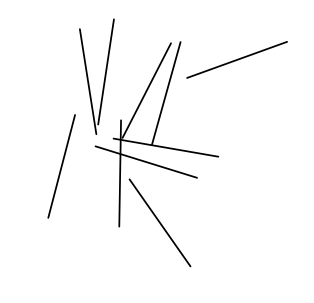

In [2]:
def generate_random_unit_segments(n, size=2.5):
    segments = []
    while len(segments) < n:
        x1 = size * random()
        y1 = size * random()
        alpha = 2 * pi * random()
        x2 = x1 + cos(alpha)
        y2 = y1 + sin(alpha)
        if 0 < x2 < size and 0 < y2 < size:
            segments.append(((x1, y1), (x2, y2)))
    return segments

def draw_segments(segments):
    im = VectorImage()
    for segment in segments:
        im.line(*segment)
    return im
            
draw_segments(generate_random_unit_segments(10))

In [17]:
def get_intersection(segment1, segment2):
    (xa, ya), (xb, yb) = segment1
    (xc, yc), (xd, yd) = segment2
    denominator = (xa-xb)*(yc-yd) - (ya-yb)*(xc-xd)
    if denominator == 0:
        print('denominator 0')
        return None
    x = ((xa*yb-ya*xb)*(xc-xd) - (xa-xb)*(xc*yd-yc*xd)) / denominator
    y = ((xa*yb-ya*xb)*(yc-yd) - (ya-yb)*(xc*yd-yc*xd)) / denominator
    if not(min(xa, xb) <= x <= max(xa, xb)):
        return None
    if not(min(xc, xd) <= x <= max(xc, xd)):
        return None
    return (x, y)

#get_intersection(((0,0), (1,1)), ((0,1), (0.1,0.9)))
get_intersection(((0,0), (1,1)), ((0,1), (1,0)))

(0.5, 0.5)

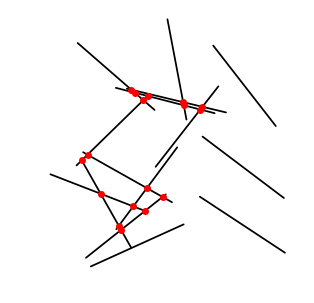

In [9]:
def get_intersections(segments):
    intersections = []
    for s1, s2 in combinations(segments, 2):
        intersection = get_intersection(s1, s2)
        if intersection:
            intersections.append(intersection)
    return intersections

def draw_points(im, points):
    # TODO: factor out to drawing.py
    for point in points:
        plt.plot([point[0]], [point[1]], 'ro')
    
def draw_segments_and_intersections(segments):
    intersections = get_intersections(segments)
    im = draw_segments(segments)
    draw_points(im, intersections)

draw_segments_and_intersections(generate_random_unit_segments(15))

-----

# B) Triangulation

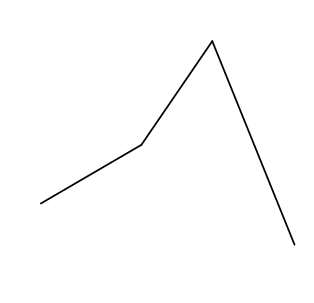

In [28]:
def generate_random_points(n, size=1):
    return [(size*random(), size*random()) for _ in range(n)]

def compute_triangulation(points):
    triangulation = []
    segments = list(combinations(points, 2))
    # TODO: sort segments by length
    for segment in segments:
        # TODO: fix
        not_intersects = all([
            get_intersection(segment, t) is None
            for t in triangulation])
        if not_intersects:
            triangulation.append(segment)
    return triangulation

def draw_triangulation(points):
    triangulation = compute_triangulation(points)
    draw_segments(triangulation)


draw_triangulation(generate_random_points(4))